   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


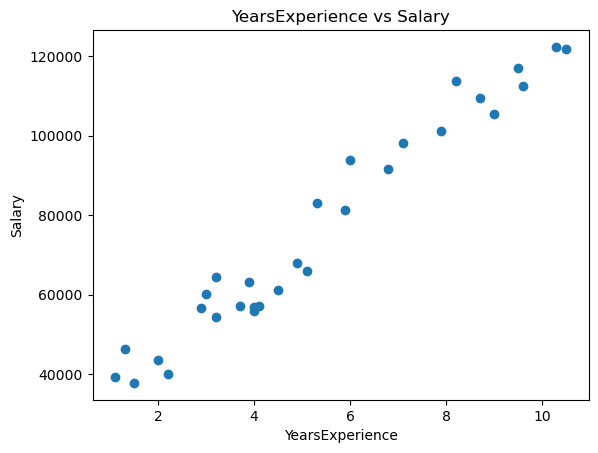

RMSE for log transformation: 9196.064796874722
RMSE for square transformation: 9672.422266258112
RMSE for sqrt transformation: 6998.9387105646


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

file_path = r"C:\Users\Owner\OneDrive\Desktop\data science assingment\simple linear regression\Salary_Data.csv"  
data = pd.read_csv(file_path)
print(data.head())
print(data.describe())

plt.scatter(data['YearsExperience'], data['Salary'])
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

X = data[['YearsExperience']]
y = data['Salary']

def calculate_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


rmse_values = {}

X_log = np.log(X)
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train)
y_pred_log = model_log.predict(X_test_log)
rmse_values['log'] = calculate_rmse(y_test, y_pred_log)

X_square = np.square(X)
X_train_square, X_test_square, y_train, y_test = train_test_split(X_square, y, test_size=0.2, random_state=42)
model_square = LinearRegression()
model_square.fit(X_train_square, y_train)
y_pred_square = model_square.predict(X_test_square)
rmse_values['square'] = calculate_rmse(y_test, y_pred_square)

X_sqrt = np.sqrt(X)
X_train_sqrt, X_test_sqrt, y_train, y_test = train_test_split(X_sqrt, y, test_size=0.2, random_state=42)
model_sqrt = LinearRegression()
model_sqrt.fit(X_train_sqrt, y_train)
y_pred_sqrt = model_sqrt.predict(X_test_sqrt)
rmse_values['sqrt'] = calculate_rmse(y_test, y_pred_sqrt)

for transformation, rmse in rmse_values.items():
    print(f'RMSE for {transformation} transformation: {rmse}')
